In [106]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.stats import norm
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [107]:
c = 299792458
h = 4.135668e-15
d = 2.82e-10
gauss_nacl = pd.read_csv('./Dados2/nacl_sem.csv',sep='\s', decimal=',')
gauss_nacl_sem_x = np.array(gauss_nacl['Ângulo'])
gauss_nacl_sem_y = np.array(gauss_nacl['R'])
gauss_nacl_x_sem_e = 1e-3 * h*c/(2*d*np.sin(gauss_nacl_sem_x * np.pi/180))

gauss_nacl = pd.read_csv('./Dados2/nacl_zr.csv',sep='\s', decimal=',')
gauss_nacl_x = np.array(gauss_nacl['Ângulo'])
gauss_nacl_y = np.array(gauss_nacl['R'])
gauss_nacl_x_e = 1e-3 * h*c/(2*d*np.sin(gauss_nacl_sem_x * np.pi/180))
gauss_nacl_y_abs = np.divide(gauss_nacl_sem_y, gauss_nacl_y)

C:\Users\victo\AppData\Local\Temp\ipykernel_9888\3628492476.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_nacl = pd.read_csv('./Dados2/nacl_sem.csv',sep='\s', decimal=',')
C:\Users\victo\AppData\Local\Temp\ipykernel_9888\3628492476.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_nacl = pd.read_csv('./Dados2/nacl_zr.csv',sep='\s', decimal=',')


In [108]:
# Dados para o plot
y_ln_a = np.log(gauss_nacl_y_abs)

In [109]:
def func(x, g, b):
    return -g*(x) + b

def func_fit(dados_x, dados_y):
    popt, pcov = curve_fit(
    f = func,
    xdata = dados_x,
    ydata = dados_y,
    maxfev=100000
    )
    return [popt, np.sqrt(np.diag(pcov))]

In [110]:
len(gauss_nacl_y) - np.argmax(gauss_nacl_y)

48

In [111]:
len(gauss_nacl_y)

96

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


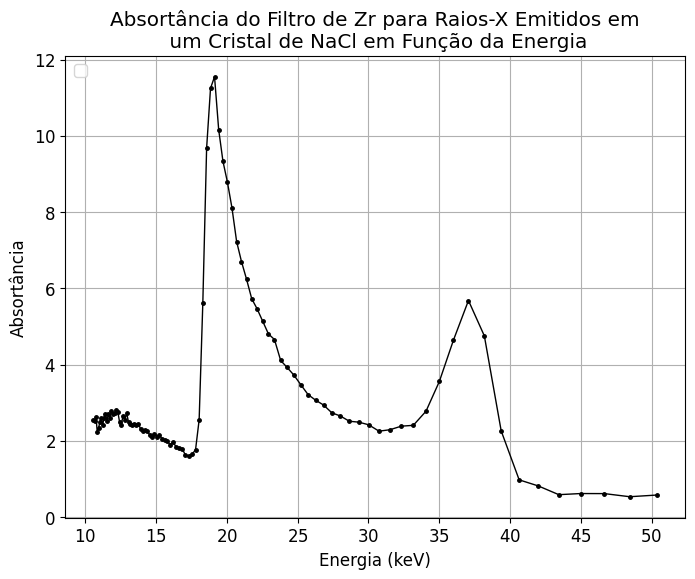

In [118]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

# plot dos pontos:
# grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_y, marker = '.', markersize=5, color = 'blue', linewidth = 1)
# grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_sem_y, marker = '.', markersize=5, color = 'red', linewidth = 1)
grafico3 = grafico.plot(gauss_nacl_x_e, gauss_nacl_y_abs, marker = '.', markersize=5, color = 'black', linewidth = 1)



# plot do ajuste


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Absortância') # eixo y
grafico.set_title('Absortância do Filtro de Zr para Raios-X Emitidos em\n um Cristal de NaCl em Função da Energia') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


In [113]:
teste_x = np.flip(gauss_nacl_x_e[16:42])
teste_x, y_ln_a[16:42]

(array([19.12611843, 19.4190737 , 19.721204  , 20.03294621, 20.35476543,
        20.68715723, 21.03065025, 21.38580894, 21.75323669, 22.13357925,
        22.52752846, 22.93582651, 23.35927055, 23.79871789, 24.25509179,
        24.72938793, 25.22268163, 25.73613601, 26.27101111, 26.82867419,
        27.41061143, 28.01844109, 28.65392857, 29.31900347, 30.01577917,
        30.74657524]),
 array([0.81286902, 0.8846598 , 0.91264587, 0.92208006, 0.97520231,
        1.00689696, 1.07848801, 1.12048028, 1.16727048, 1.24493825,
        1.31544882, 1.36762776, 1.41299838, 1.53875568, 1.56940177,
        1.63693105, 1.69813662, 1.74541856, 1.83134994, 1.90234953,
        1.97789235, 2.09395207, 2.17391714, 2.23353235, 2.3185578 ,
        2.44685409]))

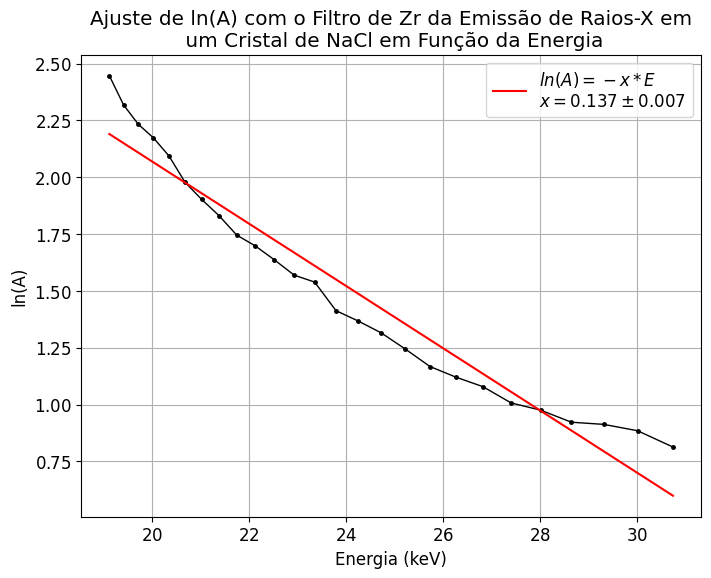

In [117]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
def func_plot(dados_x, dados_y, color_plot):
    par = func_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = func(x_model, par[0][0], par[0][1])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$ln(A) = -x*E$\n$x = {par[0][0]:.4} \pm {par[1][0]:.1}$')

# plot dos pontos:
# grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_y, marker = '.', markersize=5, color = 'blue', linewidth = 1)
# grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_sem_y, marker = '.', markersize=5, color = 'red', linewidth = 1)
grafico3 = grafico.plot(gauss_nacl_x_e[16:42], y_ln_a[16:42], marker = '.', markersize=5, color = 'black', linewidth = 1)



# plot do ajuste
func_plot(np.flip(gauss_nacl_x_e[16:42]), np.flip(y_ln_a[16:42]), 'red')

grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('ln(A)') # eixo y
grafico.set_title('Ajuste de ln(A) com o Filtro de Zr da Emissão de Raios-X em\n um Cristal de NaCl em Função da Energia') #título
grafico.legend(loc = 'upper right', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


In [115]:
np.flip(gauss_nacl_x_e[16:42]), np.flip(y_ln_a[16:42])

(array([19.12611843, 19.4190737 , 19.721204  , 20.03294621, 20.35476543,
        20.68715723, 21.03065025, 21.38580894, 21.75323669, 22.13357925,
        22.52752846, 22.93582651, 23.35927055, 23.79871789, 24.25509179,
        24.72938793, 25.22268163, 25.73613601, 26.27101111, 26.82867419,
        27.41061143, 28.01844109, 28.65392857, 29.31900347, 30.01577917,
        30.74657524]),
 array([2.44685409, 2.3185578 , 2.23353235, 2.17391714, 2.09395207,
        1.97789235, 1.90234953, 1.83134994, 1.74541856, 1.69813662,
        1.63693105, 1.56940177, 1.53875568, 1.41299838, 1.36762776,
        1.31544882, 1.24493825, 1.16727048, 1.12048028, 1.07848801,
        1.00689696, 0.97520231, 0.92208006, 0.91264587, 0.8846598 ,
        0.81286902]))